In [ ]:
from transformers import ElectraModel, ElectraTokenizer

In [7]:
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
model = ElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator")  # KoELECTRA-Base-v3

In [3]:
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [5]:
def get_embedding(text):
    # 텍스트를 토큰화하고 토큰의 ID로 변환
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    # 모델에 입력하여 hidden state 출력 (문맥적 임베딩)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # 마지막 hidden state의 첫번째 토큰 (CLS 토큰)을 문서의 임베딩으로 사용
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()
    return embeddings

In [38]:
import numpy as np

In [106]:
similarities = []
correlation_matrix = []
for i in range(1,5):
    s = []
    c = []
    f = open(f'text{i}.txt', 'r')
    text = f.read()
    embedding = get_embedding(text)
    for i in range(1, 5):
        f = open(f'text{i}.txt', 'r')
        text = f.read()
        embedding1 = get_embedding(text)
        s.append((1 + cosine_similarity(embedding, embedding1)[0][0])*50)
        c.append(np.corrcoef(embedding1, embedding)[0][1])
    similarities.append(s)
    correlation_matrix.append(c)

In [99]:
for i in similarities:
    for j in i:
        print("%.2f%%" % (j))

100.00%
63.41%
61.84%
60.31%
63.41%
100.00%
99.42%
99.30%
61.84%
99.42%
100.00%
99.38%
60.31%
99.30%
99.38%
100.00%


In [96]:
t1 = "뭐해 지금 바쁜데 빨리 나와"
t2 = "서둘러서 나와"
print("%.2f%%" % ((1 + cosine_similarity(get_embedding(t1), get_embedding(t2))[0][0])*50))

94.35%


In [51]:
similarities

[[1.0, 0.6256223022937775, 0.6184166520833969],
 [0.6256223022937775, 0.9999999105930328, 0.9942547380924225],
 [0.6184166520833969, 0.9942547380924225, 1.0]]

In [71]:
correlation_matrix

[[0.9999999999999999,
  0.2457131405972726,
  0.23123484063422808,
  0.20041062874360838],
 [0.2457131405972726, 1.0, 0.9884048251182544, 0.9858419274933422],
 [0.23123484063422806, 0.9884048251182546, 1.0, 0.9874666151248032],
 [0.2004106287436084,
  0.9858419274933423,
  0.9874666151248032,
  0.9999999999999999]]

In [73]:
correlation_matrix = np.corrcoef(embedding1, embedding2)
print(f"피어슨 상관계수: {correlation_matrix[0][1]}")

피어슨 상관계수: 0.9858419274933422


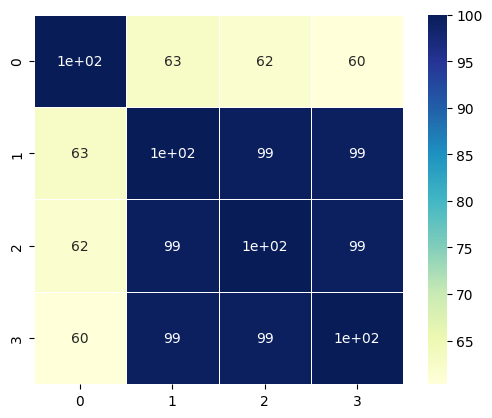

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ax = sns.heatmap(similarities, annot=True, cmap="YlGnBu", square=True, cbar_kws={"shrink": 1.00}, linewidths=.5)


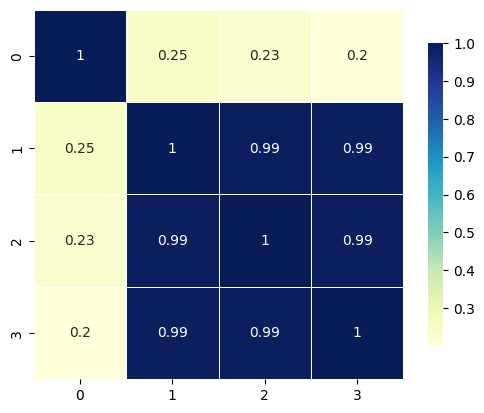

In [77]:
ax = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", square=True, cbar_kws={"shrink": .82}, linewidths=.5)